Version 0.12.2 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.


Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.96875

Generation 2 - Current best internal CV score: 0.96875

Generation 3 - Current best internal CV score: 0.9875

Generation 4 - Current best internal CV score: 0.9875

Generation 5 - Current best internal CV score: 0.9875

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.8, min_samples_leaf=1, min_samples_split=5, n_estimators=100)
TPOT Model Accuracy: 0.95
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.91      1.00      0.95        10
           2       0.80      0.80      0.80         5

    accuracy                           0.95        40
   macro avg       0.90      0.92      0.91        40
weighted avg       0.95      0.95      0.95        40



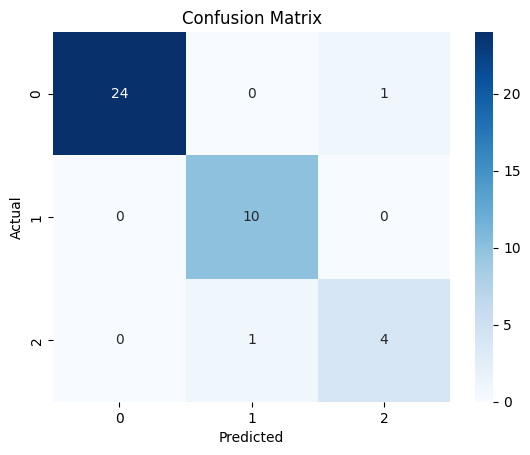

['Risk_Prediction_model.pkl']

In [11]:
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

# Load your preprocessed dataset
df = pd.read_csv("C:/Users/Administrator/processed_insurance_risk_dataset.csv")

# Ensure all categorical variables are encoded
for col in df.select_dtypes(include=['object']).columns:
    df[col] = LabelEncoder().fit_transform(df[col])

# Define features and target
X = df.drop(columns=['Risk_Score'])  # Using 'Risk_Score' as the target column
y = df['Risk_Score']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train TPOT
pipeline_optimizer = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=42)
pipeline_optimizer.fit(X_train, y_train)

# Evaluate model
y_pred = pipeline_optimizer.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"TPOT Model Accuracy: {accuracy}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Export the best model as a pickle file
joblib.dump(pipeline_optimizer.fitted_pipeline_, "Risk_Prediction_model.pkl")
